## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata_copy.csv"
study_results_path = "Study_results_copy.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
comb_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = comb_df["Mouse ID"].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dmice_ID = comb_df.loc[comb_df.duplicated(['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dmice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dmice_df = comb_df.loc[comb_df["Mouse ID"] == "g989", :]
dmice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clmd_df = comb_df[comb_df['Mouse ID'].isin(dmice_ID)==False]
clmd_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cl_mice = clmd_df["Mouse ID"].nunique()
cl_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clmd_df['Tumor Volume (mm3)'].groupby(clmd_df['Drug Regimen']).mean()
median = clmd_df['Tumor Volume (mm3)'].groupby(clmd_df['Drug Regimen']).median()
var = clmd_df['Tumor Volume (mm3)'].groupby(clmd_df['Drug Regimen']).var()
std = clmd_df['Tumor Volume (mm3)'].groupby(clmd_df['Drug Regimen']).std()
sem = clmd_df['Tumor Volume (mm3)'].groupby(clmd_df['Drug Regimen']).sem()

S_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
S_stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
S_agg =  clmd_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
S_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

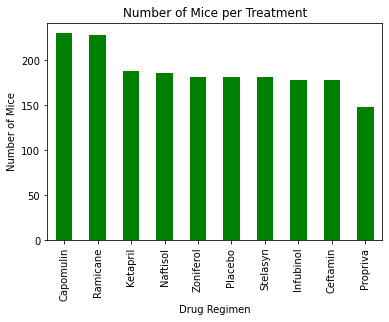

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_test_ct = clmd_df["Drug Regimen"].value_counts()
bar_plot = mice_test_ct.plot.bar(color='g') 
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

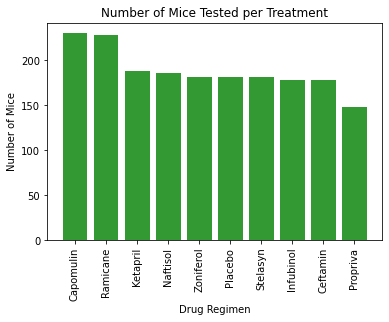

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_test_ct.index.values
y_axis = mice_test_ct.values
plt.bar(x_axis, y_axis, color='g', alpha=0.8, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()


Male      958
Female    922
Name: Sex, dtype: int64

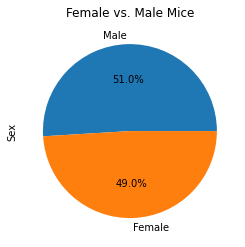

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gen_data = clmd_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
Gen_data.plot.pie(autopct= "%1.1f%%")

Gen_data 


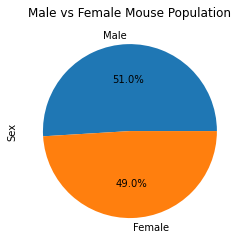

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = Gen_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

Capomulin_df = clmd_df.loc[clmd_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clmd_df.loc[clmd_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clmd_df.loc[clmd_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clmd_df.loc[clmd_df["Drug Regimen"] == "Ceftamin", :]


In [49]:
Cap_n_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Cap_n_vol = pd.DataFrame(Cap_n_last)
Cap_n_mrg = pd.merge(Cap_n_vol, clmd_df, on=("Mouse ID","Timepoint"),how="left")
#Cap_n_mrg.head()


In [15]:
#Capomulin
Cap_n_T = Cap_n_mrg["Tumor Volume (mm3)"]

quartiles =Cap_n_T.quantile([.25,.5,.75])
lowerQ = quartiles[0.25]
upperQ = quartiles[0.75]
iqr = upperQ-lowerQ


print(f"The lower quartile of Capomulin tumors: {lowerQ}")
print(f"The upper quartile of Capomulin tumors: {upperQ}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

L_bound = lowerQ - (1.5*iqr)
U_bound = upperQ + (1.5*iqr)

print(f"Values below {L_bound} could be outliers.")
print(f"Values above {U_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [16]:
#Ramicane
#Ram_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
#Ram_vol = pd.DataFrame(Ram_last)
#Ram_mrg = pd.merge(Ram_vol, clmd_df, on=("Mouse ID","Timepoint"),how="left")
#Ram_mrg.head()
#Ram_mrg.to_csv("output.csv")
#Ram_T = Ram_mrg["Tumor Volume (mm3)"]


In [17]:
#Ramicane
Ram_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ram_vol = pd.DataFrame(Ram_last)
Ram_mrg = pd.merge(Ram_vol, clmd_df, on=("Mouse ID","Timepoint"),how="left")
Ram_mrg.head()
#Ram_mrg.to_csv("output.csv")
Ram_T = Ram_mrg["Tumor Volume (mm3)"]

quartiles =Ram_T.quantile([.25,.5,.75])
lowerQ = quartiles[0.25]
upperQ = quartiles[0.75]
iqr = upperQ-lowerQ


print(f"The lower quartile of Ramicane tumors is: {lowerQ}")
print(f"The upper quartile of Ramicane tumors is: {upperQ}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

L_bound = lowerQ - (1.5*iqr)
U_bound = upperQ + (1.5*iqr)

print(f"Values below {L_bound:.2f} could be outliers.")
print(f"Values above {U_bound:.2f} could be outliers.")
Ram_mrg.to_csv("output.csv")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [19]:
#Infubinol
Infub_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infub_vol = pd.DataFrame(Infub_last)
Infub_mrg = pd.merge(Infub_vol, clmd_df, on=("Mouse ID","Timepoint"),how="left")
#Infub_mrg.head()

Infub_T = Infub_mrg["Tumor Volume (mm3)"]

quartiles =Infub_T.quantile([.25,.5,.75])
lowerQ = quartiles[0.25]
upperQ = quartiles[0.75]
iqr = upperQ-lowerQ


print(f"The lower quartile of Infubinol tumors is: {lowerQ}")
print(f"The upper quartile of Infubinol tumors is: {upperQ}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

L_bound = lowerQ - (1.5*iqr)
U_bound = upperQ + (1.5*iqr)


print(f"Values below {L_bound:.2f} could be outliers.")
print(f"Values above {U_bound:.2f} could be outliers.")
Infub_mrg.to_csv("output.csv")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


In [20]:
#Ceftamin
Ceft_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceft_vol = pd.DataFrame(Ceft_last)
Ceft_mrg = pd.merge(Ceft_vol, clmd_df, on=("Mouse ID","Timepoint"),how="left")
#Ceft_mrg.head()
Ceft_T = Ceft_mrg["Tumor Volume (mm3)"]

quartiles = Ceft_T.quantile([.25,.5,.75])
lowerQ = quartiles[0.25]
upperQ = quartiles[0.75]
iqr = upperQ-lowerQ

print(f"The lower quartile of treatment is: {lowerQ}")
print(f"The upper quartile of temperatures is: {upperQ}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

L_bound = lowerQ - (1.5*iqr)
U_bound = upperQ + (1.5*iqr)

print(f"Values below {L_bound:.2f} could be outliers.")
print(f"Values above {U_bound:.2f} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


In [26]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tx_med_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
meds = comb_df[comb_df["Drug Regimen"].isin(tx_med_list)]
meds.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [56]:
last_TP = meds.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

last_TP = last_TP.stack(level=0).unstack(level=0)
for med in tx_med_list:
    print(med)

Capomulin
Ramicane
Infubinol
Ceftamin


In [74]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

tx = [0]

for med in tx_med_list:
    quartiles = last_TP[med].quantile([.25,.5,.75]).round(2)
    lowerQ = quartiles[0.25].round(2)
    upperQ = quartiles[0.75].round(2)
    iqr = round(upperQ-lowerQ,2)
    L_bound = round(lowerQ - (1.5*iqr),2)
    U_bound = round(upperQ + (1.5*iqr),2)
    
    
if  tx == [0]:
    print(f"------------------------------------------------------------")
    print(f"The lower quartile of {med} treatments is: {lowerQ}")
    print(f"The upper quartile of {med} treatments is: {upperQ}")
    print(f"The interquartile range of {med} treatments is: {iqr}")
    print(f"Values below {L_bound} could be {med} outliers.")
    print(f"Values above {U_bound} could be {med} outliers.")
    print(f"------------------------------------------------------------")
    tx=[0+1]

------------------------------------------------------------
The lower quartile of Ceftamin treatments is: 48.72
The upper quartile of Ceftamin treatments is: 64.3
The interquartile range of Ceftamin treatments is: 15.58
Values below 25.35 could be Ceftamin outliers.
Values above 87.67 could be Ceftamin outliers.
------------------------------------------------------------


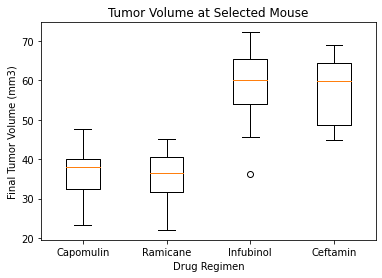

In [44]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
four_reg = [Cap_n_T, Ram_T, Infub_T, Ceft_T]
Reg = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(four_reg, labels=Reg, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

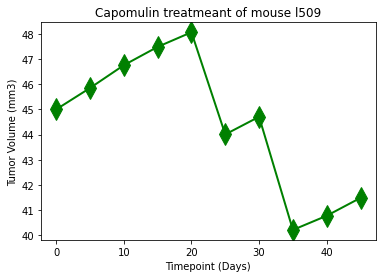

In [45]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_p_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_p_df.head()
x_axis = line_p_df["Timepoint"]
T_sz = line_p_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, T_sz,linewidth=2, markersize=15,marker="d",color="g", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

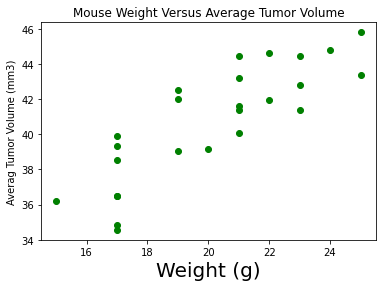

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_c_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=20
plt.scatter(avg_c_vol['Weight (g)'],avg_c_vol['Tumor Volume (mm3)'], color="g")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =20)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [48]:
cor = st.pearsonr(avg_c_vol['Weight (g)'],avg_c_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(cor[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84
